# Clase 1 - Reducción de dimensionalidad - PCA

## Conceptos

### PCA: Análisis de Componentes Principales

**¿Qué es?**  
El Análisis de Componentes Principales (PCA) es un método de reducción de dimensionalidad que transforma un conjunto de variables posiblemente correlacionadas en un conjunto de nuevas variables no correlacionadas llamadas componentes principales. Estas componentes se ordenan de forma que la primera captura la mayor cantidad posible de varianza, la segunda captura la siguiente mayor cantidad, y así sucesivamente.

---

**¿Cómo funciona?**  
1. **Centrar los datos**: Se restan las medias de cada característica para centrar los datos alrededor del origen.
2. **Calcular la matriz de covarianza**: Evalúa las relaciones entre las características.
3. **Encontrar autovalores y autovectores**: Los autovectores son los nuevos ejes (direcciones principales), y los autovalores indican la varianza capturada por cada eje.
4. **Proyectar los datos**: Los datos se transforman al nuevo espacio definido por los autovectores, priorizando las componentes principales.

---

**¿Cuándo se usa?**  
- Cuando los datos tienen **alta dimensionalidad**, y deseas simplificar el modelo eliminando redundancias.
- Para **visualizar datos** multivariados en 2 o 3 dimensiones.
- Como un paso previo para mejorar el rendimiento de **modelos de machine learning**, especialmente cuando las características están correlacionadas.
- En problemas donde se necesita reducir el **ruido** de datos.

---

**Ventajas**  
- **Reducción de dimensionalidad**: Facilita el análisis y entrenamiento de modelos.
- **Elimina redundancias**: Al trabajar con componentes no correlacionadas.
- **Mejora la eficiencia**: Reduce el tiempo de procesamiento para datos de alta dimensionalidad.
- **Ayuda en la visualización**: Proyecta datos complejos a 2D o 3D para una mejor comprensión.

---

**Desventajas**  
- **Pérdida de interpretabilidad**: Las nuevas componentes no tienen un significado intuitivo como las variables originales.
- **Dependencia de escala**: Requiere escalado de las características para funcionar correctamente.
- **Pérdida de información**: Si se seleccionan pocas componentes, puede eliminar información importante.
- **No captura relaciones no lineales**: PCA asume que las relaciones entre características son lineales, lo que limita su uso en ciertos casos.

---

**Conclusión**  
PCA es una herramienta poderosa para simplificar y analizar datos complejos, pero debe usarse con cuidado en casos donde la interpretabilidad o las relaciones no lineales son cruciales.


## Configuración de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Ejemplo de aplicación simple con gráfico de 2 componentes

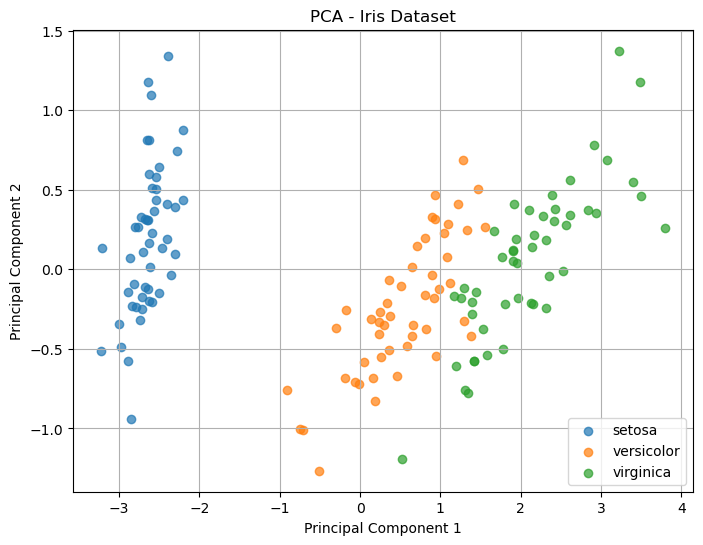

In [2]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear un DataFrame para una mejor visualización inicial
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map(lambda i: target_names[i])

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convertir los datos transformados en un DataFrame para visualización
df_pca = pd.DataFrame(X_pca, columns=["Principal Component 1", "Principal Component 2"])
df_pca['target'] = y
df_pca['target_name'] = df_pca['target'].map(lambda i: target_names[i])

# Visualización de los datos proyectados
plt.figure(figsize=(8, 6))
for target, color in zip(range(len(target_names)), ['red', 'green', 'blue']):
    subset = df_pca[df_pca['target'] == target]
    plt.scatter(
        subset["Principal Component 1"], 
        subset["Principal Component 2"], 
        label=target_names[target], 
        alpha=0.7
    )
plt.title("PCA - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


## Paso a paso para su ejecución

### Cargamos el dataset

In [3]:
# Cargar el dataset Digits
digits = load_digits()

# Explorar el dataset
X = digits.data  # Features (64 dimensiones)
y = digits.target  # Target (dígitos del 0 al 9)

# Crear un DataFrame para visualizar
df_digits = pd.DataFrame(X, columns=[f"Pixel_{i}" for i in range(X.shape[1])])
df_digits['target'] = y

# Mostrar las primeras filas
print("Dimensiones del dataset:")
print(f"Features: {X.shape[1]}, Ejemplos: {X.shape[0]}")
print("Primeras 5 filas del dataset:")
df_digits.head()


Dimensiones del dataset:
Features: 64, Ejemplos: 1797
Primeras 5 filas del dataset:


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Escalamos los datos

#### Conceptos

¿Por qué usar escalación estándar en PCA?

Escalar los datos es crucial en PCA porque este método se basa en la **varianza de las características**, y la varianza es sensible al rango de los datos. Aquí está el detalle de por qué la **escalación estándar (media 0, desviación estándar 1)** es la más adecuada:

---

1. **PCA se basa en la covarianza**  
   PCA identifica componentes principales calculando los **autovalores y autovectores de la matriz de covarianza** de las características.  
   - Si las características tienen rangos muy diferentes (por ejemplo, una característica entre 0 y 1, y otra entre 0 y 1000), la covarianza estará dominada por las características con mayores magnitudes, lo que sesgará los componentes principales hacia esas características.

---

2. **Por qué escalación estándar (Z-score)**  
   La escalación estándar transforma cada característica para que tenga:  
   - **Media 0**: Centrar los datos elimina el impacto de las diferencias en el promedio entre características.  
   - **Desviación estándar 1**: Normalizar la escala asegura que todas las características tengan el mismo peso relativo en el cálculo de la varianza.  

   Por ejemplo:  
   - Una característica en un rango de \(0-1000\) no dominará sobre otra en un rango de \(0-1\), ya que ambas estarán en un rango similar después de la escalación estándar.

---

3. **Por qué no otras escalaciones**  
   - **Min-Max Scaling**: Escala los datos al rango [0, 1]. Si hay valores atípicos, distorsionará la escala. Además, no asegura que todas las características tengan la misma varianza, lo que podría sesgar los componentes principales.  
   - **Max Abs Scaling**: Escala por el valor máximo absoluto. Es menos efectiva en datasets donde las características tienen distribuciones muy diferentes.  
   - **Escalación robusta**: Puede usarse si hay muchos valores atípicos, pero aún no asegura una distribución normalizada adecuada para PCA.

---

4. **Excepción: PCA sin escalar**  
   Si todas las características tienen ya la **misma escala y rango** (como en datasets donde todas las características son proporciones o puntuaciones normalizadas), no sería necesario escalar los datos.

---

**Conclusión**  
La escalación estándar es la opción preferida porque:  
1. Asegura que todas las características contribuyan equitativamente al análisis de varianza.  
2. Evita que características con mayor magnitud sesguen los componentes principales.


#### Aplicación

In [4]:
# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)[:5]}")


Resumen de datos escalados:
Media por característica (aproximadamente 0): [ 0.00000000e+00 -2.56086502e-16 -2.34771702e-16 -3.05326777e-16
  1.39689163e-16]
Desviación estándar por característica (aproximadamente 1): [0. 1. 1. 1. 1.]


### Identificamos la cantidad de componentes óptima para nuestro problema

#### Aplicar PCA sin reducir dimensiones para calcular todas las componentes principales

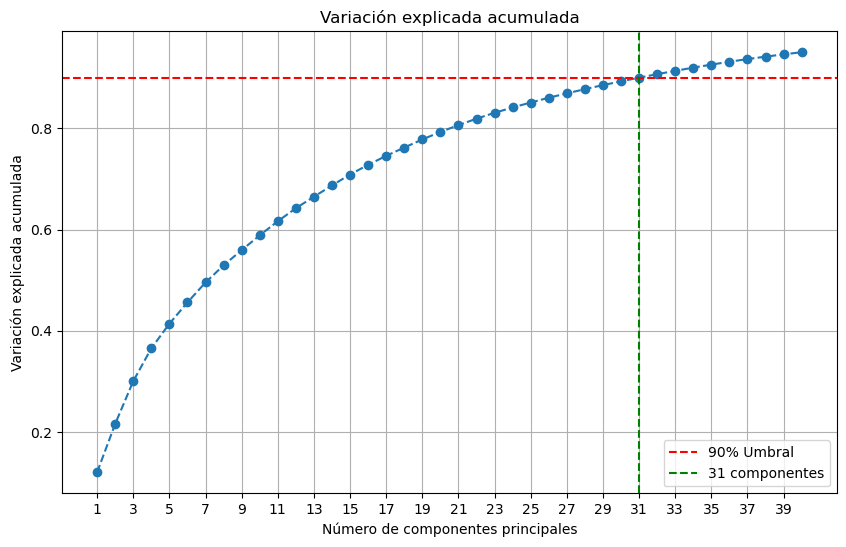

Variación explicada acumulada:
Componente 1: 12.03%
Componente 2: 21.59%
Componente 3: 30.04%
Componente 4: 36.54%
Componente 5: 41.40%
Componente 6: 45.61%
Componente 7: 49.55%
Componente 8: 52.94%
Componente 9: 55.94%
Componente 10: 58.87%
Componente 11: 61.66%
Componente 12: 64.23%
Componente 13: 66.51%
Componente 14: 68.74%
Componente 15: 70.90%
Componente 16: 72.81%
Componente 17: 74.59%
Componente 18: 76.23%
Componente 19: 77.82%
Componente 20: 79.31%
Componente 21: 80.66%
Componente 22: 81.93%
Componente 23: 83.10%
Componente 24: 84.16%
Componente 25: 85.13%
Componente 26: 86.08%
Componente 27: 86.94%
Componente 28: 87.78%
Componente 29: 88.57%
Componente 30: 89.32%
Componente 31: 90.05%
Componente 32: 90.74%
Componente 33: 91.39%
Componente 34: 92.03%
Componente 35: 92.62%
Componente 36: 93.20%
Componente 37: 93.72%
Componente 38: 94.20%
Componente 39: 94.65%
Componente 40: 95.08%


In [5]:
pca_full = PCA(n_components=40)
pca_full.fit(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 41, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")


#### Calcular la ganancia de varianza explicada (diferencia acumulada entre componentes consecutivas)

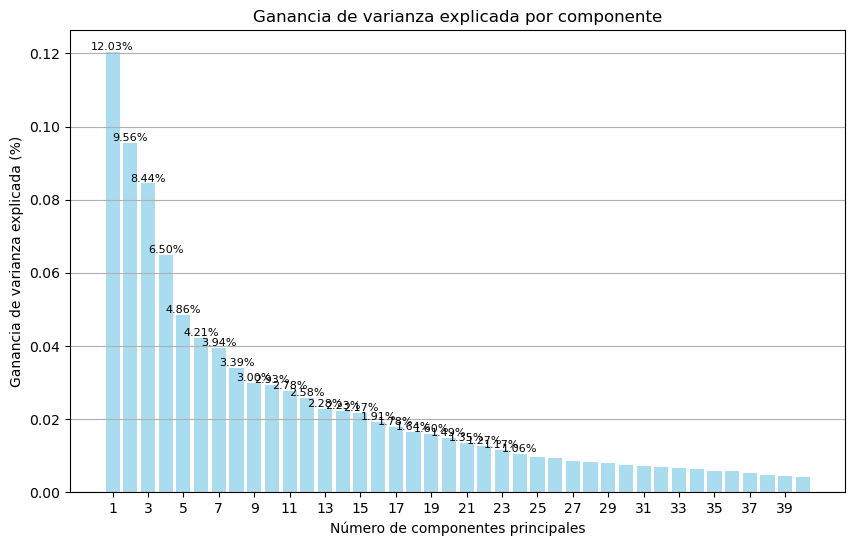

Ganancia de varianza explicada por componente:
Componente 1: 12.03%
Componente 2: 9.56%
Componente 3: 8.44%
Componente 4: 6.50%
Componente 5: 4.86%
Componente 6: 4.21%
Componente 7: 3.94%
Componente 8: 3.39%
Componente 9: 3.00%
Componente 10: 2.93%
Componente 11: 2.78%
Componente 12: 2.58%
Componente 13: 2.28%
Componente 14: 2.23%
Componente 15: 2.17%
Componente 16: 1.91%
Componente 17: 1.78%
Componente 18: 1.64%
Componente 19: 1.60%
Componente 20: 1.49%
Componente 21: 1.35%
Componente 22: 1.27%
Componente 23: 1.17%
Componente 24: 1.06%
Componente 25: 0.98%
Componente 26: 0.94%
Componente 27: 0.86%
Componente 28: 0.84%
Componente 29: 0.80%
Componente 30: 0.75%
Componente 31: 0.73%
Componente 32: 0.69%
Componente 33: 0.65%
Componente 34: 0.64%
Componente 35: 0.59%
Componente 36: 0.57%
Componente 37: 0.52%
Componente 38: 0.48%
Componente 39: 0.45%
Componente 40: 0.42%


In [6]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 41), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 41, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")


#### Aplicamos el PCA con la cantidad de componentes seleccionados

In [7]:
# Aplicar PCA con el número seleccionado de componentes
pca_final = PCA(n_components=31)
X_pca_31 = pca_final.fit_transform(X_scaled)

explained_variance = pca_final.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 31 componentes
explained_variance_31 = pca_final.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 31 componentes: {explained_variance_31:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_scaled.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_31.shape[1]}")

Varianza explicada por cada componente principal:
Componente 1: 12.03%
Componente 2: 9.56%
Varianza explicada total con 31 componentes: 90.05%
Dimensiones originales: 64
Dimensiones reducidas: 31


### Entrenamos un modelo con y sin PCA

#### Modelo Random Forest sin PCA

In [8]:
# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo sin PCA
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)

# Evaluar el rendimiento sin PCA
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Resultados sin PCA:")
print(f"Precisión: {accuracy_original:.2%}")
print(classification_report(y_test, y_pred_original))


Resultados sin PCA:
Precisión: 97.22%
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



#### Modelo Random Forest con PCA

In [9]:
# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA al conjunto de entrenamiento y prueba (31 componentes)
pca_final = PCA(n_components=31)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test)

# Modelo con PCA
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

# Evaluar el rendimiento con PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("\nResultados con PCA:")
print(f"Precisión: {accuracy_pca:.2%}")
print(classification_report(y_test, y_pred_pca))

# Comparar los resultados
print("\nComparación de precisiones:")
print(f"Sin PCA: {accuracy_original:.2%}")
print(f"Con PCA: {accuracy_pca:.2%}")


Resultados con PCA:
Precisión: 96.94%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.91      0.95        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Comparación de precisiones:
Sin PCA: 97.22%
Con PCA: 96.94%


#### Graficar las primeras dos componentes principales

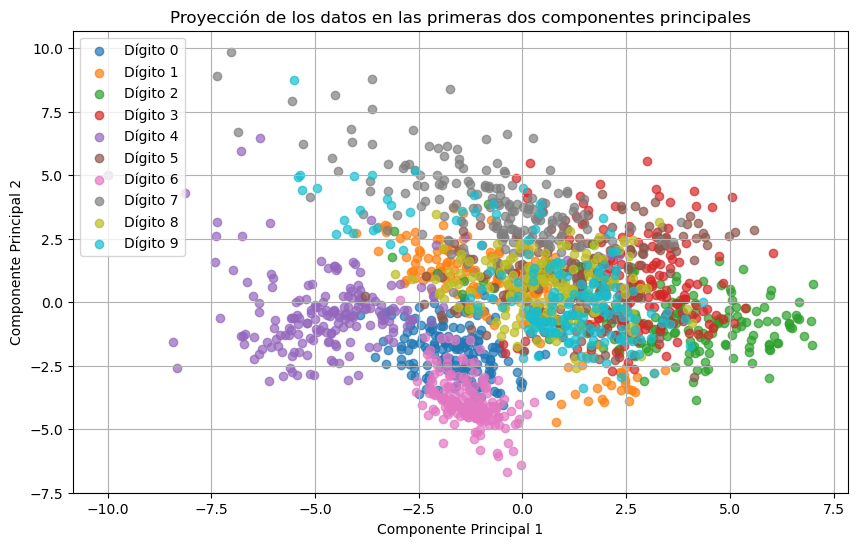

In [10]:
plt.figure(figsize=(10, 6))
for i in range(len(digits.target_names)):
    subset = X_pca_31[y == i][:, :2]  # Usar solo las primeras 2 componentes
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Dígito {i}', alpha=0.7)

plt.title('Proyección de los datos en las primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

#### Obtener las componentes principales

In [11]:
pca_components = pd.DataFrame(pca_final.components_, 
                              columns=[f"Pixel_{i}" for i in range(X.shape[1])],
                              index=[f"Componente_{i}" for i in range(1, 32)])

# Mostrar las características más importantes para la primera componente principal
print("Características más importantes para la primera componente principal:")
print(pca_components.loc["Componente_1"].sort_values(ascending=False).head(10))

Características más importantes para la primera componente principal:
Pixel_2     0.286663
Pixel_58    0.281370
Pixel_9     0.245142
Pixel_10    0.224522
Pixel_3     0.218460
Pixel_59    0.195224
Pixel_1     0.190649
Pixel_57    0.167199
Pixel_28    0.146104
Pixel_20    0.145494
Name: Componente_1, dtype: float64


#### Medir el tiempo de entrenamiento 

In [12]:
# Medir el tiempo de entrenamiento sin PCA
start = time.time()
clf_original.fit(X_train, y_train)
end = time.time()
print(f"Tiempo de entrenamiento sin PCA: {end - start:.4f} segundos")

# Medir el tiempo de entrenamiento con PCA
start = time.time()
clf_pca.fit(X_train_pca, y_train)
end = time.time()
print(f"Tiempo de entrenamiento con PCA: {end - start:.4f} segundos")


Tiempo de entrenamiento sin PCA: 0.1784 segundos
Tiempo de entrenamiento con PCA: 0.3549 segundos


#### Evaluación del modelo con matriz de confusión

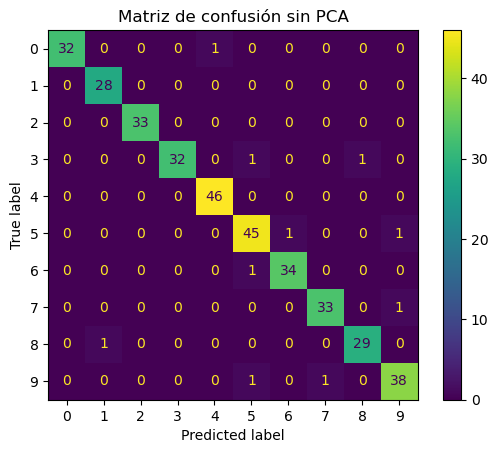

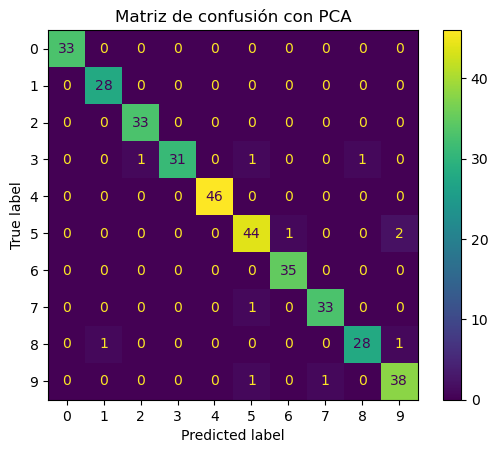

In [13]:
# Matriz de confusión sin PCA
cm_original = confusion_matrix(y_test, y_pred_original)
ConfusionMatrixDisplay(cm_original, display_labels=digits.target_names).plot()
plt.title("Matriz de confusión sin PCA")
plt.show()

# Matriz de confusión con PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)
ConfusionMatrixDisplay(cm_pca, display_labels=digits.target_names).plot()
plt.title("Matriz de confusión con PCA")
plt.show()
